<a href="https://colab.research.google.com/github/KonstantinSergeev2/Data-analysis/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Пункт 1 - загружаем данные из файла.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Загружаем данные из файла boston.csv.
dataF = pd.read_csv('sample_data/boston.csv')

# Создаём табличку с расшифровкой признаков.
columns_description = {
    'CRIM': 'уровень преступности',
    'ZN': 'доля жилых земель, разделенных на участки площадью более 25 000 кв.футов',
    'INDUS': 'доля площадей, не связанных с розничной торговлей',
    'CHAS': 'наличие реки (1, если граничит с рекой; 0 в противном случае)',
    'NOX': 'качество воздуха (концентрация оксидов азота)',
    'RM': 'среднее количество комнат в доме',
    'AGE': 'доля жилых помещений, построенных владельцами до 1940 года',
    'DIS': 'взвешенные расстояния до пяти бостонских центров занятости',
    'RAD': 'транспортная доступность (индекс доступности радиальных автомагистралей)',
    'TAX': 'налоги (ставка налога на 10 000 долларов США)',
    'PTRATIO': 'соотношение количества учеников и учителей',
    'B': 'нормированное значение доли афроамериканцев среди жителей',
    'LSTAT': 'процент населения с низким социальным статусом',
    'MEDV': 'медианная цена недвижимости (тыс. $) – это и будет целевой признак'
}

print("Расшифровка названий столбцов:")
for column_name, description in columns_description.items():
    print(f"  {column_name} - {description}")

print("\nПервые 10 строк данных:")
display(dataF.head(10))

Расшифровка названий столбцов:
  CRIM - уровень преступности
  ZN - доля жилых земель, разделенных на участки площадью более 25 000 кв.футов
  INDUS - доля площадей, не связанных с розничной торговлей
  CHAS - наличие реки (1, если граничит с рекой; 0 в противном случае)
  NOX - качество воздуха (концентрация оксидов азота)
  RM - среднее количество комнат в доме
  AGE - доля жилых помещений, построенных владельцами до 1940 года
  DIS - взвешенные расстояния до пяти бостонских центров занятости
  RAD - транспортная доступность (индекс доступности радиальных автомагистралей)
  TAX - налоги (ставка налога на 10 000 долларов США)
  PTRATIO - соотношение количества учеников и учителей
  B - нормированное значение доли афроамериканцев среди жителей
  LSTAT - процент населения с низким социальным статусом
  MEDV - медианная цена недвижимости (тыс. $) – это и будет целевой признак

Первые 10 строк данных:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Загружаем данные из файла, выводим данные и делаем также расширофку признаков, чтобы было наглядно видно и понятно, что за цифры у нас выводятся.

In [ ]:
# Пункт 2 - проверка типов данных (числовой тип).
print("Тип данных:")
display(dataF.dtypes)

Тип данных:


,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,float64
TAX,float64


С помощью dtypes проверяем тип данных. Все признаки имеют числовой тип float64, а это значит числовой тип, значит всё хорошо.

In [ ]:
# Пункт 3 - проверка отсутствующих данных в признаках (если есть, то заполняем их медианным значением).
dataF.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


Мы видим, что отсутствующих данных нет, а это значит, что ничего дополнительно делать не нужно.

In [ ]:
# Пункт 4 - Расчет коэффициента корреляции для всех пар признаков.
corr_matrix = dataF.corr()
print("Корреляционная матрица:")
corr_matrix.head(14)

Корреляционная матрица:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Вычисляем матрицу коэффицента корелляции Пирсона между числовыми признаками.

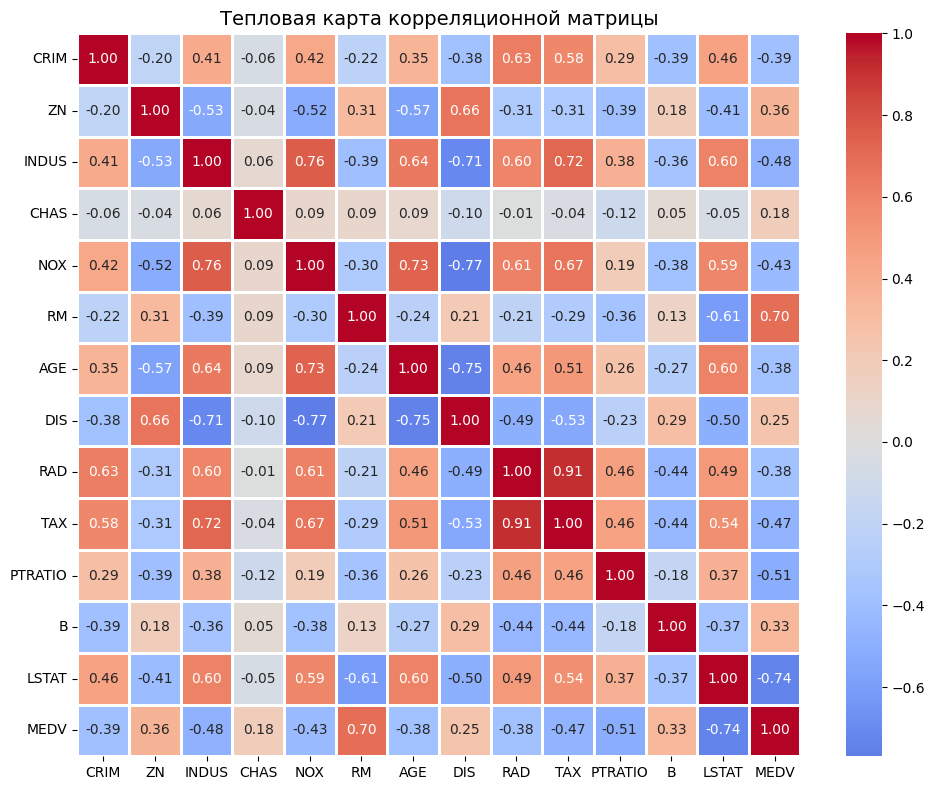

In [ ]:
# Пункт 5 - построение тепловой карты корреляционной матрицы.

# Делаем тепловую карту.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Тепловая карта корреляционной матрицы', fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Строим тепловую карту. Теперь наглядно видно связь между признаками, наиболее значимыми для прогнозирования цены недвижимости - RM (среднее количество комнат), тут сильная положительная корелляция 0.7 и LSTAT (процент низкого социального статуса населения) -0.74. Также мы видим, что у районов с хорошей транспортной доступностью (RAD), высокие налоги (TAX) - 0.91

In [ ]:
# Пункт 6 - выбор 6  признаков для анализа.

# Смотрим корреляции с целевым признаком MEDV.
corr_with_target = corr_matrix['MEDV'].abs().sort_values(ascending=False)
print("Корреляции признаков с целевой переменной MEDV:")
display(corr_with_target)

# Выбираем признаки с наибольшей корреляцией с MEDV.
selected_features = corr_with_target.index[1:7]
print("\nВыбранные признаки для анализа:")
print(list(selected_features))

Корреляции признаков с целевой переменной MEDV:


,MEDV
MEDV,1.000000
LSTAT,0.737663
RM,0.695360
PTRATIO,0.507787
INDUS,0.483725
TAX,0.468536
NOX,0.427321
CRIM,0.388305
RAD,0.381626
AGE,0.376955



Выбранные признаки для анализа:
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']


Выбираем 6 признаков наиболее подходящих для анализа путём сортировки (abs().sort_values(ascending=False) - сортировка по убыванию, обязательно по модулю, чтобы учесть в полной мере и отрицательные значения), выбор пал в итоге на LSTAT (процент населения с низким социальным статусом), RM (среднее количество комнат в доме), PTRATIO (соотношение количества учеников и учителей), INDUS (доля площадкй, не связанных с розничной торговлей), TAX (налоги), NOX (качество воздуха).

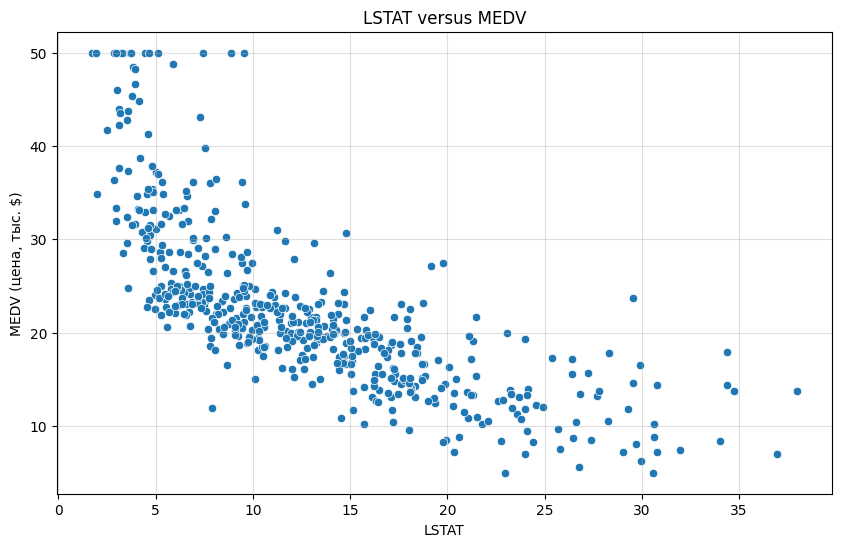

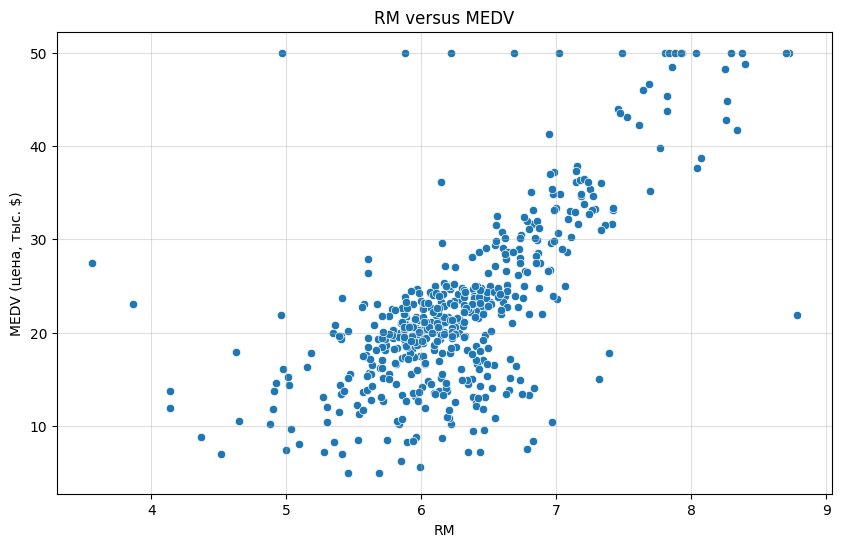

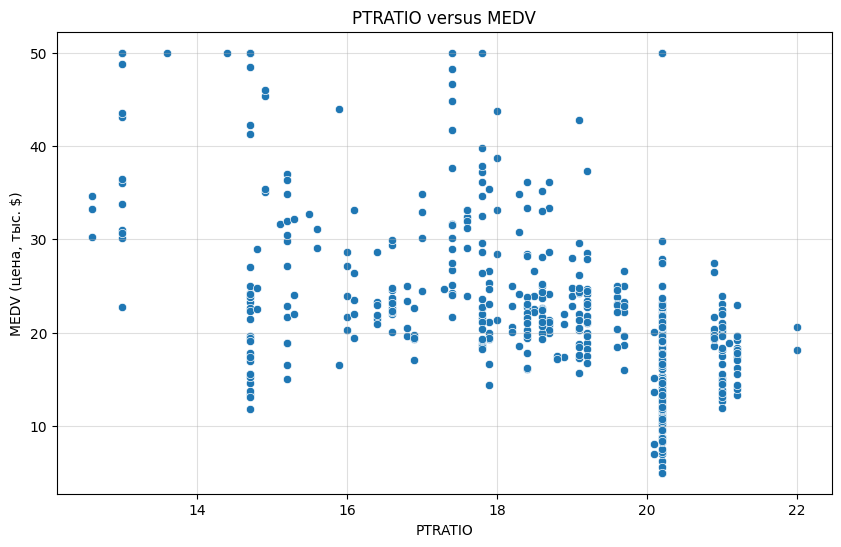

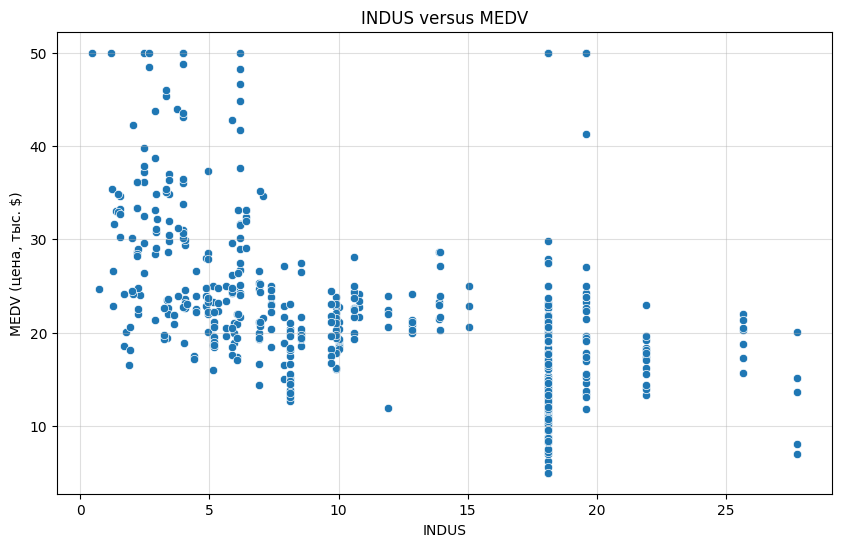

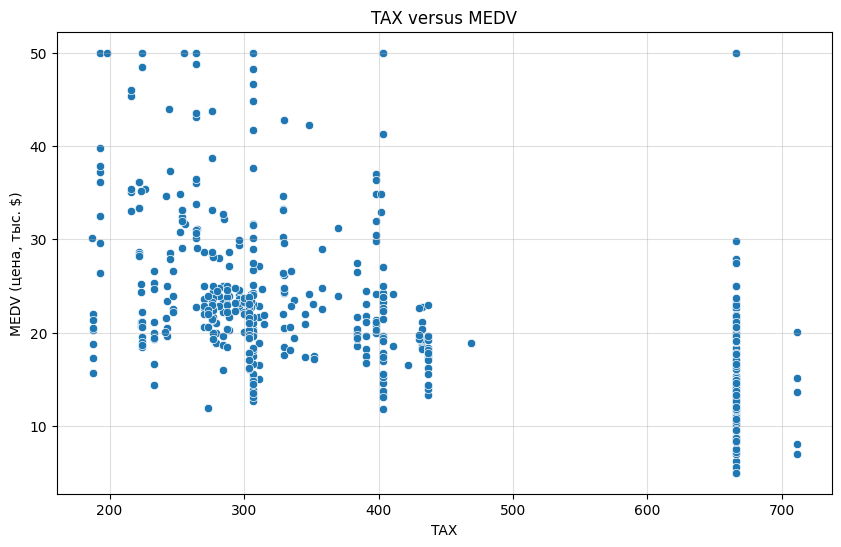

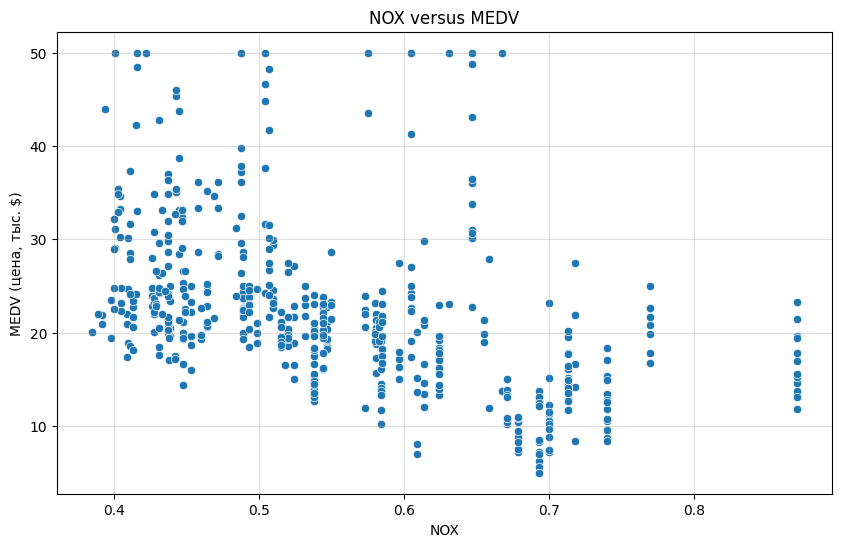

In [ ]:
# Пункт 7 - Построение точечных диаграмм для выбранных признаков с целевым признаком.

for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=dataF[feature], y=dataF['MEDV'])
    plt.title(f'{feature} versus MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV (цена, тыс. $)')
    plt.grid(True, alpha=0.4)
    plt.show()


Для каждого признака (из шести) строим точечную диаграмму (рассеяния) с помощью sns.scatterplot. Диаграммы показывают взаимосвязь между значением выборочного признака и целевого.

***Пункт 8 - убеждаемся, что связь между выбранным признаком и целевым прослеживается.***

**LSTAT versus MEDV** - мощная отрицательная зависимость. Чем выше процент
населения с низким социальным статусом, тем ниже цена дома.

**RM versus MEDV** - сильная положительная зависимость. Соответственно чеми больше комнат, тем выше цена дома.

**PTRATIO versus MEDV** - умеренная отрицательная зависимость. В районах, где учеников на учителя много, цены ниже и наоборот.

**INDUS versus MEDV** - умеренная отрицательная зависимость. Цены в промышленных районах на дома ниже.

**TAX versus MEDV** - умеренная отрицательная зависимость. При высоких налогах, цены на дома ниже.

**NOX versus MEDV** - умеренная отрицательная зависимость. Если воздух загрязнён, то цены на дома ниже.


In [ ]:
# Пункт 9 - формирование списка факторных признаков и целевой переменной.
# Список факторных признаков.
feature_list = list(selected_features)
print("Список факторных признаков:")
print(feature_list)
print(f"Количество признаков: {len(feature_list)}")

# Матрица признаков.
x = dataF[feature_list]
print("\nМатрица признаков x:")
print(f"Размерность: {x.shape}")
display(x.head(10))

# Целевая переменная.
y = dataF['MEDV']
print("\nЦелевая переменная y:")
print(f"Размерность: {y.shape}")
display(y.head(10))

Список факторных признаков:
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']
Количество признаков: 6

Матрица признаков x:
Размерность: (506, 6)


,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,4.98,6.575,15.3,2.31,296.0,0.538
1,9.14,6.421,17.8,7.07,242.0,0.469
2,4.03,7.185,17.8,7.07,242.0,0.469
3,2.94,6.998,18.7,2.18,222.0,0.458
4,5.33,7.147,18.7,2.18,222.0,0.458
5,5.21,6.430,18.7,2.18,222.0,0.458
6,12.43,6.012,15.2,7.87,311.0,0.524
7,19.15,6.172,15.2,7.87,311.0,0.524
8,29.93,5.631,15.2,7.87,311.0,0.524
9,17.10,6.004,15.2,7.87,311.0,0.524



Целевая переменная y:
Размерность: (506,)


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


Формирование списка факторных признаков и целевая переменная.

In [ ]:
# Пункт 10 - разбиение датасета на обучающую и тестовую выборки.
# Разделяем данные датасета на обучающую и тестовую выборки в соотношение 8:2 (80% на 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print("Результаты разбиения датасета:")
print(f"Исходный размер x: {x.shape}")
print(f"Исходный размер y: {y.shape}")
print(f"Обучающая выборка x_train: {x_train.shape}")
print(f"Обучающая выборка y_train: {y_train.shape}")
print(f"Тестовая выборка x_test: {x_test.shape}")
print(f"Тестовая выборка y_test: {y_test.shape}")

Результаты разбиения датасета:
Исходный размер x: (506, 6)
Исходный размер y: (506,)
Обучающая выборка x_train: (404, 6)
Обучающая выборка y_train: (404,)
Тестовая выборка x_test: (102, 6)
Тестовая выборка y_test: (102,)


train_test_split - делит случайным образом исходные данные на две части, где обучающая выборка (80%) - 404 наблюдения для обучения модели, а тестовая выборка (20%) - 102 наблюдения для оценки качества модели. С помощью random_state гарантируем случайное деление и так как мы присвоили значение "5", то при каждом запуске будем получать одинаковое разбиение.

In [ ]:
# Пункт 11 - обучение модели линейной регрессии.
# Создаем модель линейной регрессии.
model = LinearRegression()
# Обучаем модель на тренировочных данных.
model.fit(x_train, y_train)

print("Модель линейной регрессии обучена.")

print(f"Коэффициенты модели:")
for i, feature in enumerate(x.columns):
    print(f" {feature}: {model.coef_[i]:.4f}")

Модель линейной регрессии обучена.
Коэффициенты модели:
 LSTAT: -0.6501
 RM: 3.9845
 PTRATIO: -0.9499
 INDUS: 0.0601
 TAX: -0.0017
 NOX: -0.5776


Обучаем модель линейной регрессии. Она анализирует тренировочные данные (404 района) и посредством обучения, начинает понимать зависимость и предсказывать стоимость дома при разных условиях. Например, благодаря model.coef_ мы знаем, что при увелечении количества комнат на 1, цена дома увеличивается на 3.9845 тысячи долларов или то, что при увеличении бедного населения на 1%, цена снижается на 650 долларов.

In [ ]:
# Пункт 12 - получение прогнозных значений.
# Делаем предсказания на обучающей выборке.
y_train_pred = model.predict(x_train)
# Делаем предсказания на тестовой выборке.
y_test_pred = model.predict(x_test)

print("Прогнозные значения получены:")
print(f"Предсказания для обучающей выборки: {y_train_pred.shape}")
print(f"Предсказания для тестовой выборки: {y_test_pred.shape}")

print("\nПримеры предсказаний:")
print("Реальные цены:", y_test.values[:10])
print("Предсказанные цены:", y_test_pred[:10].round(2))

Прогнозные значения получены:
Предсказания для обучающей выборки: (404,)
Предсказания для тестовой выборки: (102,)

Примеры предсказаний:
Реальные цены: [37.6 27.9 22.6 13.8 35.2 10.4 23.9 29.  22.8 23.2]
Предсказанные цены: [36.59 28.33 25.96  0.88 32.03  7.75 27.66 28.16 26.35 20.3 ]


Метод predict() применяет обученную модель линейной регрессии для предсказания цен на дома. После чего выводим для наглядности примеры предсказаний. На основе этих данных можно сделать вывод, что модель довольно близкие цены предсказывает, что в целом удовлетворительный результат.

In [ ]:
# Пункт 13 - оценка качества модели с помощью коэфф.детерминации (R^2) и корня из среднеквадратичной ошибки (RMSE).
# Вычисляем R^2 (коэффициент детерминации) для обучающей и тестовой выборок.
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
# Вычисляем RMSE (корень из среднеквадратичной ошибки) для обучающей и тестовой выборок.
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Коэффициент детерминации R^2:")
print(f"Обучающая выборка: {r2_train:.4f}")
print(f"Тестовая выборка:  {r2_test:.4f}")
print(f"Корень из среднеквадратичной ошибки (RMSE):")
print(f"Обучающая выборка: {RMSE_train:.2f} тыс. $")
print(f"Тестовая выборка:  {RMSE_test:.2f} тыс. $")

Коэффициент детерминации R^2:
Обучающая выборка: 0.6732
Тестовая выборка:  0.6964
Корень из среднеквадратичной ошибки (RMSE):
Обучающая выборка: 5.30 тыс. $
Тестовая выборка:  4.88 тыс. $


Качество модели скорее удовлетворительное, R^2 = +-0.68, это означает, что модель объясняет около 68% изменчивости цен на дома, что в целом нормально. Средняя ошибка предсказания 4800-5300 долларов, при средней стоимости в 22-23 тысячи, это скорее удовлетворительный результат для начала.

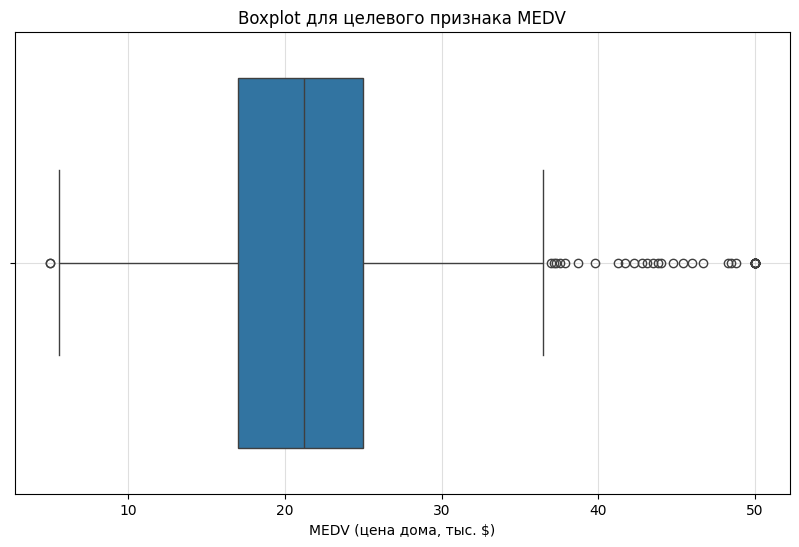

In [ ]:
# Пункт 14 (доп) - построение boxplot для целевого признака MEDV.
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataF['MEDV'])
plt.title('Boxplot для целевого признака MEDV')
plt.xlabel('MEDV (цена дома, тыс. $)')
plt.grid(True, alpha=0.4)
plt.show()

По ящику с усами видим выбросы, где цена дома выше 35 тысяч, сильные выбросы в районе 50 тысяч.

Размер данных до удаления выбросов: (506, 14)
Размер данных после удаления выбросов: (490, 14)
Удалено наблюдений: 16

Результаты после удаления выбросов
R^2 на обучающей выборке: 0.7179
R^2 на тестовой выборке: 0.7644
RMSE на обучающей выборке: 4.12 тыс. $
RMSE на тестовой выборке: 4.01 тыс. $


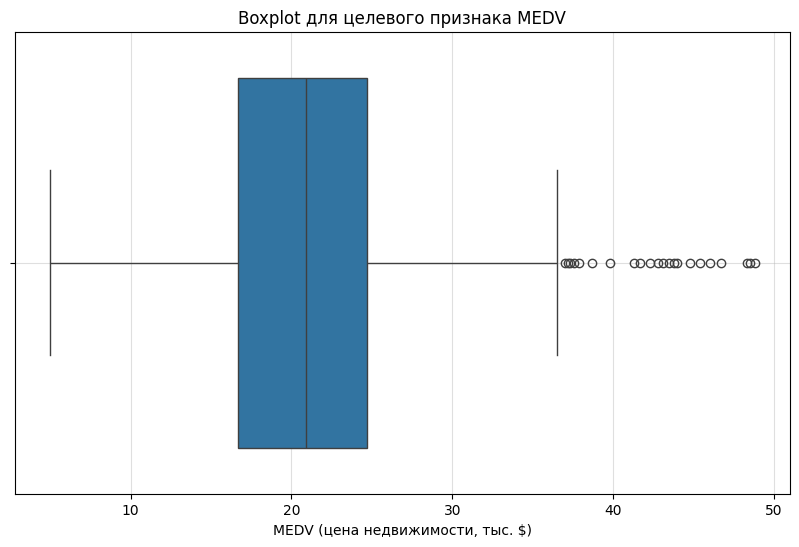

In [ ]:
# Пункт 15 (доп) - удаление выбросов и переобучение модели.

# Удаляем выбросы (дома дороже 50 тыс. $).
data_filtered = dataF[dataF['MEDV'] < 50.0]
print(f"Размер данных до удаления выбросов: {dataF.shape}")
print(f"Размер данных после удаления выбросов: {data_filtered.shape}")
print(f"Удалено наблюдений: {dataF.shape[0] - data_filtered.shape[0]}")

# Создаем новые признаки и целевую переменную.
x_filtered = data_filtered[selected_features]
y_filtered = data_filtered['MEDV']

# Разделяем на обучающую и тестовую выборки.
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(x_filtered, y_filtered, test_size=0.2, random_state=5)

# Создаем и обучаем новую модель.
model_filtered = LinearRegression()
model_filtered.fit(x_train_filtered, y_train_filtered)

# Делаем предсказания и вычисляем метрики.
y_train_pred_filtered = model_filtered.predict(x_train_filtered)
y_test_pred_filtered = model_filtered.predict(x_test_filtered)

r2_train_filtered = r2_score(y_train_filtered, y_train_pred_filtered)
r2_test_filtered = r2_score(y_test_filtered, y_test_pred_filtered)
rmse_train_filtered = np.sqrt(mean_squared_error(y_train_filtered, y_train_pred_filtered))
rmse_test_filtered = np.sqrt(mean_squared_error(y_test_filtered, y_test_pred_filtered))

print("\nРезультаты после удаления выбросов")
print(f"R^2 на обучающей выборке: {r2_train_filtered:.4f}")
print(f"R^2 на тестовой выборке: {r2_test_filtered:.4f}")
print(f"RMSE на обучающей выборке: {rmse_train_filtered:.2f} тыс. $")
print(f"RMSE на тестовой выборке: {rmse_test_filtered:.2f} тыс. $")

# Строим новый boxplot.
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_filtered['MEDV'])
plt.title('Boxplot для целевого признака MEDV')
plt.xlabel('MEDV (цена недвижимости, тыс. $)')
plt.grid(True, alpha=0.4)
plt.show()

Удаление выбросов, т.е домов дороже 50 тысяч, значительно улучшило качество модели, модель стала лучше вычислять коэффициент детерминации (R^2) до: Коэффициент детерминации R^2:
Обучающая выборка: 0.6732
Тестовая выборка:  0.6964
После:
R^2 на обучающей выборке: 0.7179
R^2 на тестовой выборке: 0.7644
И модель начала делать более точные предсказания, RMSE упал довольно значительно.

In [ ]:
# Пункт 16 (доп) - обучение гребневой регрессии (Ridge).
ridge_model = Ridge(alpha=3.0)
ridge_model.fit(x_train_filtered, y_train_filtered)

# Делаем предсказания на тестовой выборке.
y_test_pred_ridge = ridge_model.predict(x_test_filtered)

r2_test_ridge = r2_score(y_test_filtered, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test_filtered, y_test_pred_ridge))

print("Гребневая регрессия (Ridge)")
print(f"R^2 на тестовой выборке: {r2_test_ridge:.4f}")
print(f"RMSE на тестовой выборке: {rmse_test_ridge:.2f} тыс. $")

y_train_pred_ridge = ridge_model.predict(x_train_filtered)
r2_train_ridge = r2_score(y_train_filtered, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train_filtered, y_train_pred_ridge))

print(f"\nR^2 на обучающей выборке: {r2_train_ridge:.4f}")
print(f"RMSE на обучающей выборке: {rmse_train_ridge:.2f} тыс. $")

Гребневая регрессия (Ridge)
R^2 на тестовой выборке: 0.7606
RMSE на тестовой выборке: 4.04 тыс. $

R^2 на обучающей выборке: 0.7174
RMSE на обучающей выборке: 4.12 тыс. $


Гребневая регрессия показала практически такой же результат, как обычная линейная регрессия. Но в перспективе гребневая регрессия может быть устойчивее и в последствии предпочтительнее при выборе. Alpha - регуляризация модели, если значение низкое, то поощаряются лёгкие пути, что помогает уменьшить сложность модели и предотвращет переобучение.

In [ ]:
# Пункт 17 (доп) - построение полиномиальной регрессии 3-й степени.
poly_model = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LinearRegression())
poly_model.fit(x_train_filtered, y_train_filtered)
# Предсказания на тестовой выборке.
y_test_pred_poly = poly_model.predict(x_test_filtered)

r2_test_poly = r2_score(y_test_filtered, y_test_pred_poly)
rmse_test_poly = np.sqrt(mean_squared_error(y_test_filtered, y_test_pred_poly))

print("Полиномиальная регрессия 3-й степени")
print(f"R^2 на тестовой выборке: {r2_test_poly:.4f}")
print(f"RMSE на тестовой выборке: {rmse_test_poly:.2f} тыс. $")

y_train_pred_poly = poly_model.predict(x_train_filtered)
r2_train_poly = r2_score(y_train_filtered, y_train_pred_poly)
rmse_train_poly = np.sqrt(mean_squared_error(y_train_filtered, y_train_pred_poly))

print(f"\nR^2 на обучающей выборке: {r2_train_poly:.4f}")
print(f"RMSE на обучающей выборке: {rmse_train_poly:.2f} тыс. $")

Полиномиальная регрессия 3-й степени
R^2 на тестовой выборке: 0.8995
RMSE на тестовой выборке: 2.62 тыс. $

R^2 на обучающей выборке: 0.9035
RMSE на обучающей выборке: 2.41 тыс. $


Полиномиальная регрессия с использованием 3й стенпени показала отличный результат. Коэффициент детерминации достиг аж 0.8995 на тестовой выборке и 0.9035 на обучающей выборке, а до этого наш максимум был - 0.7606 и 0.7174 соответственно. А ещё модель начала делать предсказания значительно точнее, RMSE снизился до 2.62 тысяч долларов на тестовой выборке и до 2.41 тысяч долларов на обучающей выборке, когда до этого лучшим результатом было 4.04 тысячи и  4.12 тысяч. С чем это может быть связано? С тем, что в данных есть сильные нелинейные зависимости, с которыми нынешняя модель как раз хорошо работает.

***И что же мы имеем?***
*   Удаление выбросов - это довольно важный этап при работе с моделью, так как сразу хорошо вырастет качество модели.
*   Гребневая регрессия (Ridge) не самый лучший вариант для обучения, так как существенного прироста качество модели она не принесла, если сравнивать с обычной линейной регрессией. Однако ridge может показать себя лучше при более сложных данных за счёт возможности регуляризации модели.
*   Полиноминальная регрессия 3-й степени стала лучшей, качество модели выросло очень сильно, выше уже упомянул, что R^2 вырос аж до 0.9, а RMSE упал до 2.4-2.6 тысячи.


